<a href="https://colab.research.google.com/github/Denniskag/Python-Assignment/blob/main/Machine_Learning_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ABOUT THE DATASET***


**Context :**
The National Institute of Diabetes and Digestive and Kidney Diseases is the original source of this dataset. Based on specific diagnostic metrics included in the collection, the dataset aims to diagnostically predict the presence or absence of diabetes in a patient. These examples were chosen from a bigger database under a number of restrictions. Specifically, all of the patients in this facility are Pima Indian women who are at least 21 years old.

In [261]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from collections import Counter


In [262]:
#Iporting dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/pima indians diabetes/diabetes.csv')

In [263]:
#Displaying first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [264]:
#Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [265]:
#Checking for shape of dataset
data.shape

(768, 9)

In [266]:
#Displaying the statistics of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [267]:
# Checking how many actual zeros are in the columns where their presence is impossible
zeros_count = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
zeros_count

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [268]:
# List of columns where zeros should be replaced with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in the specified columns
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

In [269]:
# Check the count of NaN values in each column
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [270]:
#Replace all nan values with the mean value of the respective column
df= data.fillna(data.mean())

In [271]:
#Getting the statistics of the data after filling the missing values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [272]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [273]:
#Check for duplicates
df.duplicated().sum()

0

**Visualization**

Distribution of Target variable(Outcome)

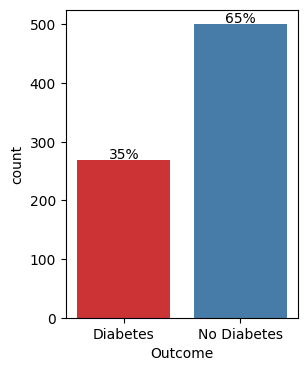

In [274]:
#Create differrent dataframe for visualisation purposes
df_eda= df.copy()
#Replacing zeros with no diabetes abd 1 with diabetes
df_eda['Outcome'].replace({0: 'No Diabetes', 1: 'Diabetes'}, inplace=True)
total=float(len(df_eda))
plt.figure(figsize=(3, 4))
ax=sns.countplot(x="Outcome",data=df_eda, palette='Set1')
for i in ax.patches:
    height=i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 3
           ,'{0:.0%}'.format(height/total),ha="center")

Distribution of independent variables

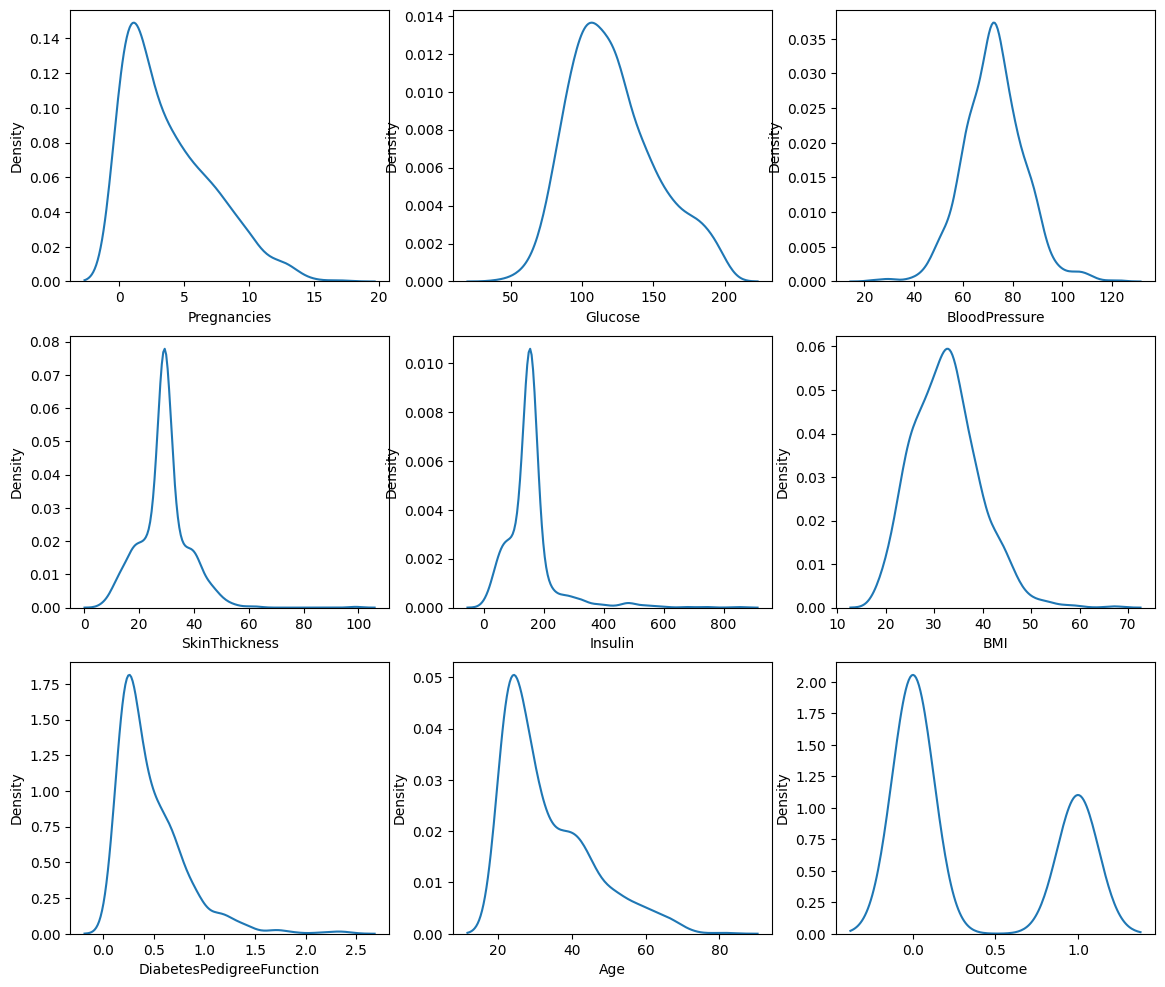

In [275]:
plt.figure(figsize=(14,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

Checking for Outliers

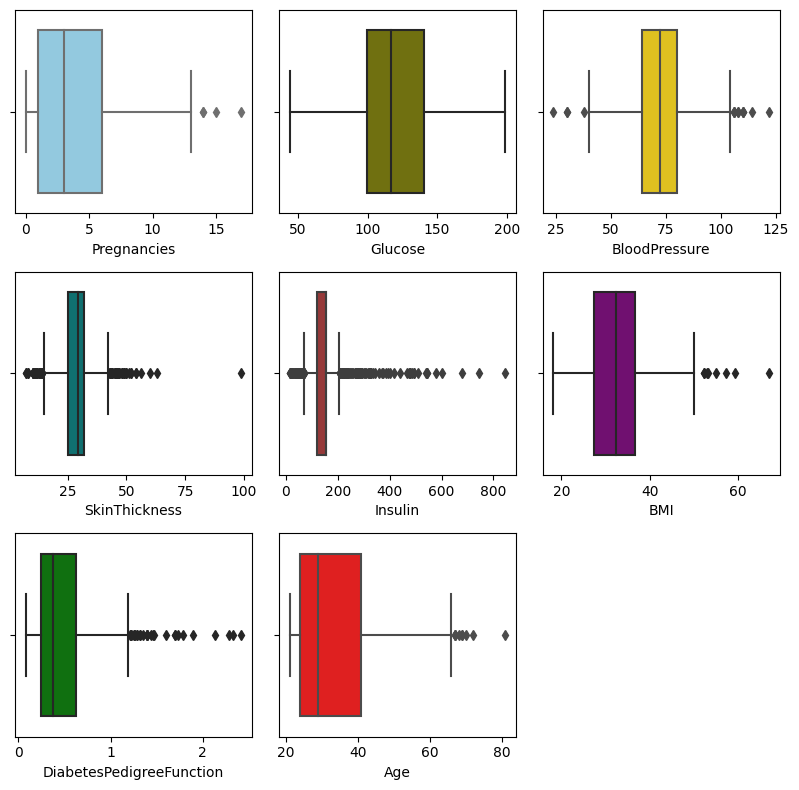

In [276]:
# Generate a box plot for each feature
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red']
f, axes = plt.subplots(3, 3, figsize=(8, 8), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
f.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Handling Outliers

In [277]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness                7.000000
Insulin                     34.048223
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


In [278]:
#handling the outliers
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","No.of Outliers","Handled?"])
    for col in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5*iqr)
        high = q3 + (1.5*iqr)
        n = df.loc[(df[col] < low) | (df[col] > high)].shape[0]

        df.loc[(df[col] < low),col] = low
        df.loc[(df[col] > high),col] = high

        outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df[col].all() < high},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,No.of Outliers,Handled?
0,Glucose,0,True
1,BMI,8,True
2,Insulin,164,True
3,Pregnancies,4,True
4,Age,9,True
5,SkinThickness,87,True
6,DiabetesPedigreeFunction,29,True
7,BloodPressure,14,True


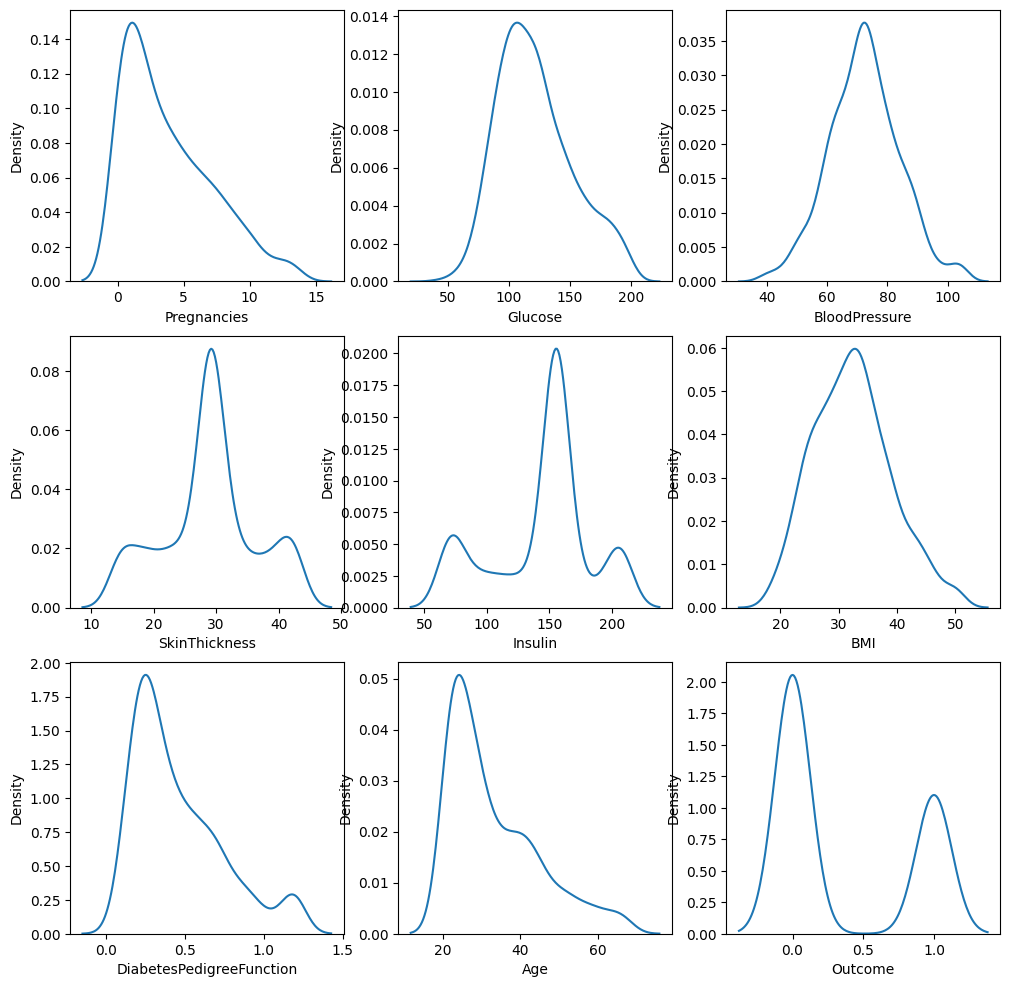

In [279]:
## Checking Normal Distributions of the graph of each feature after handling outliers
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

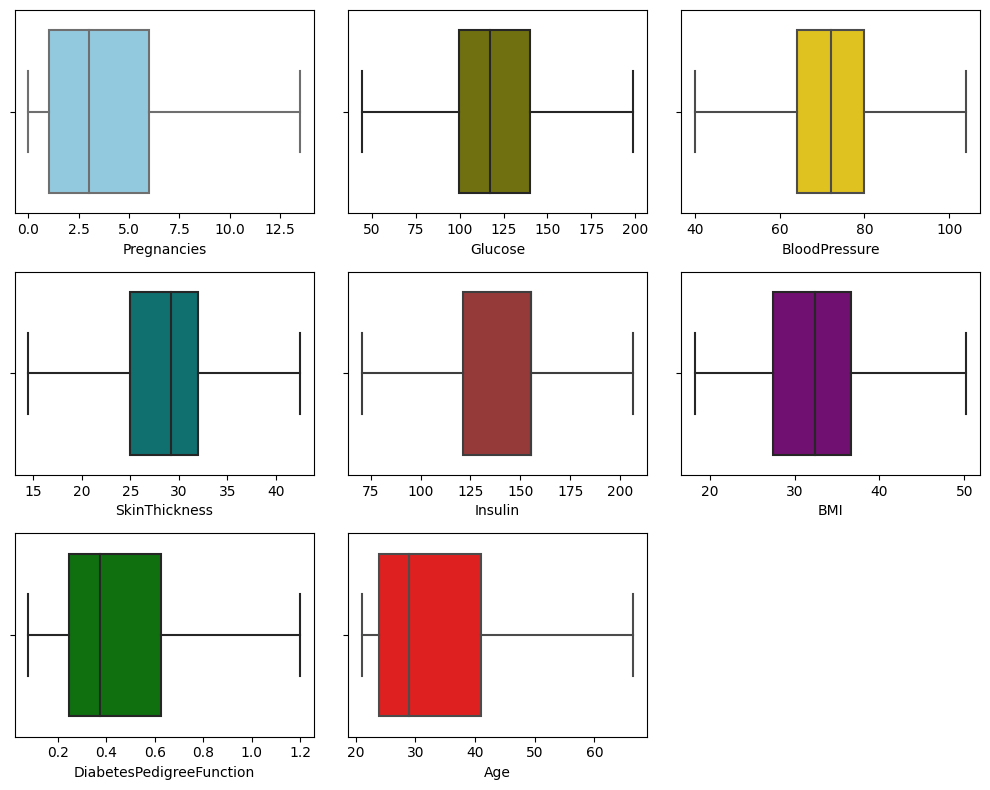

In [280]:
# Generate a box plot for each feature
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red']
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
f.delaxes(axes[-1])
plt.tight_layout()
plt.show()

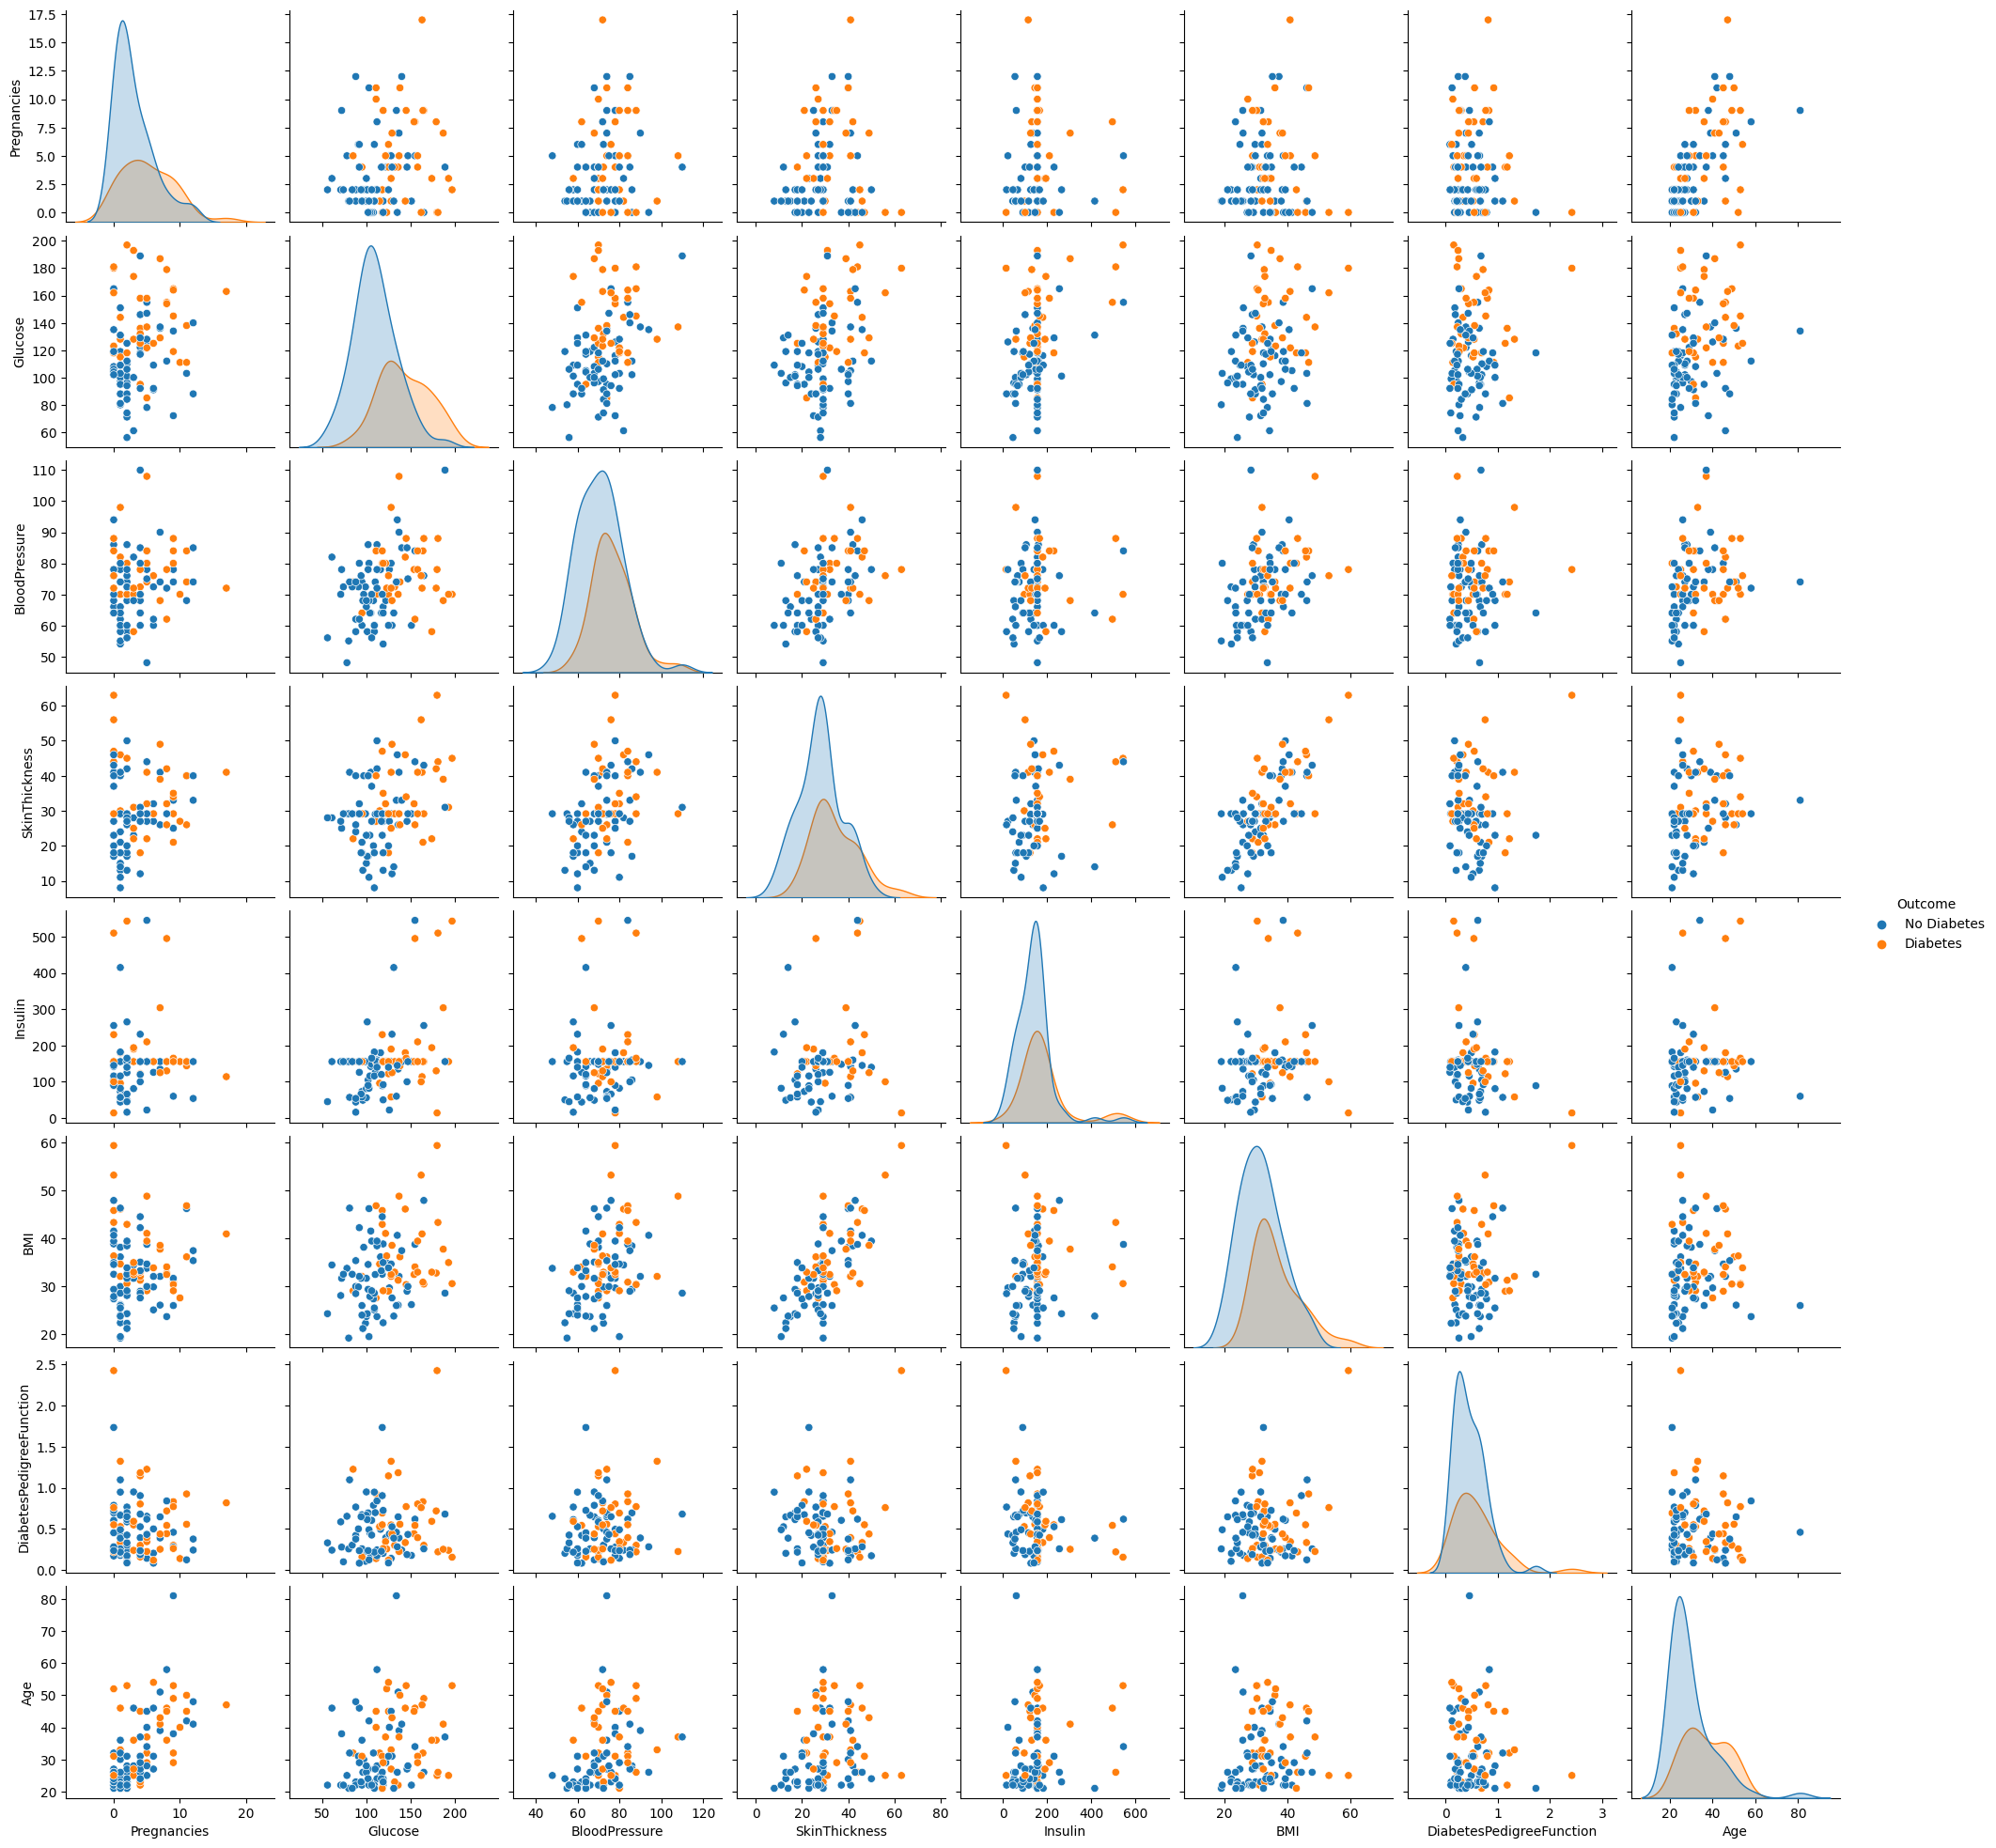

In [281]:
# We'll use a sample of the data to make the pairplot faster to generate
df_sample = df_eda.sample(100, random_state=1)

# Create a pairplot
sns.pairplot(df_sample, hue="Outcome")
plt.show()

**Feature selection**

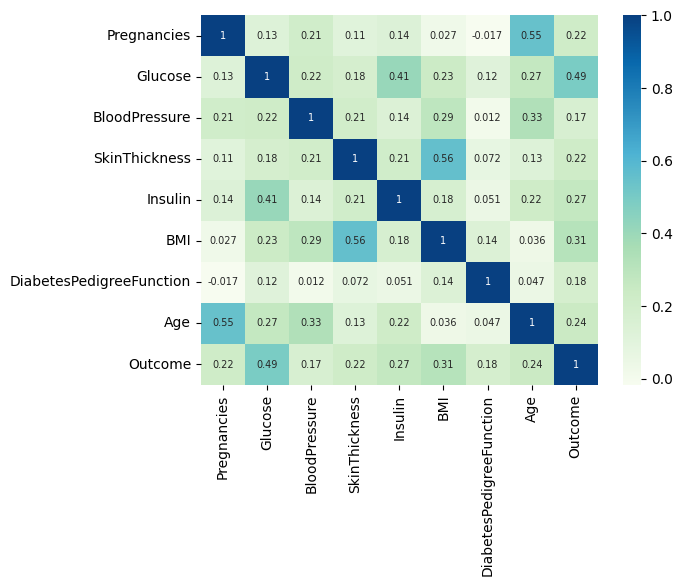

In [282]:
#Plot correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='GnBu', annot_kws={"size":7})
plt.show()

**Correlation  with target variable**

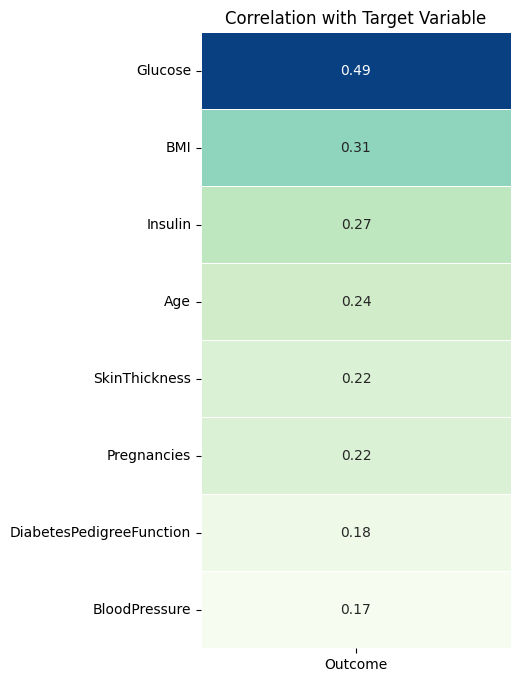

In [283]:
# Create a correlation matrix with the target variable
corr_with_target = df.corr()['Outcome'].drop('Outcome')

# Sort features by correlation with the target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True, cbar=False, linewidths=.5)
plt.title('Correlation with Target Variable')
plt.show()

In [284]:
#Droping 2 columns
#df_new = df.drop(['BloodPressure', 'SkinThickness'], axis=1)
#df_new = df.drop(['Pregnancies', 'SkinThickness'], axis=1)
#df_new = df.drop(['Pregnancies', 'DiabetesPedigreeFunction'], axis=1)
df_new = df.drop(['BloodPressure', 'DiabetesPedigreeFunction'], axis=1)

In [285]:
df_new.shape

(768, 7)

**Building Model**

In [286]:
#Splitting the dataset into features and target
X = df_new.drop(columns=['Outcome'])  # Features
y = df_new['Outcome']  # Target

In [287]:
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,35.00000,155.548223,33.6,50.0
1,1.0,85.0,29.00000,155.548223,26.6,31.0
2,8.0,183.0,29.15342,155.548223,23.3,32.0
3,1.0,89.0,23.00000,94.000000,28.1,21.0
4,0.0,137.0,35.00000,168.000000,43.1,33.0


In [288]:
#Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =0)

In [289]:
#Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVM**

In [290]:
svm_classifier = SVC(probability = True, kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [291]:
y_pred_svm = svm_classifier.predict(X_test)

[[98  9]
 [21 26]]
Accuracy: 0.8051948051948052
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



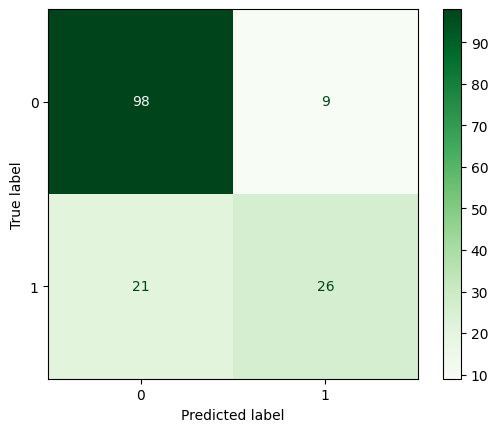

In [292]:
cm1 = confusion_matrix(y_test, y_pred_svm)
print(cm1)
acc_svc = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {acc_svc}' )
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap = 'Greens')

In [293]:
svm_classifier.get_params

<bound method BaseEstimator.get_params of SVC(kernel='linear', probability=True)>

**KNN**

In [294]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [295]:
y_pred_knn = KNN_classifier.predict(X_test)

[[90 17]
 [19 28]]
Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154



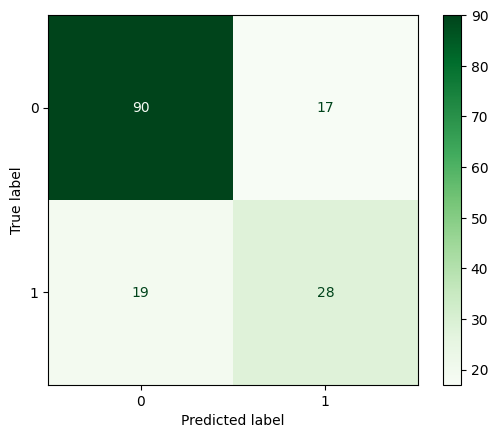

In [296]:
cm2 = confusion_matrix(y_test, y_pred_knn)
print(cm2)
acc2= accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {acc2}' )
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap = 'Greens')


**Naive Bayes**

In [297]:
NaiveBayes_classifier = GaussianNB()
NaiveBayes_classifier.fit(X_train, y_train)

GaussianNB()

In [298]:
y_pred_nb = NaiveBayes_classifier.predict(X_test)

[[86 21]
 [16 31]]
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



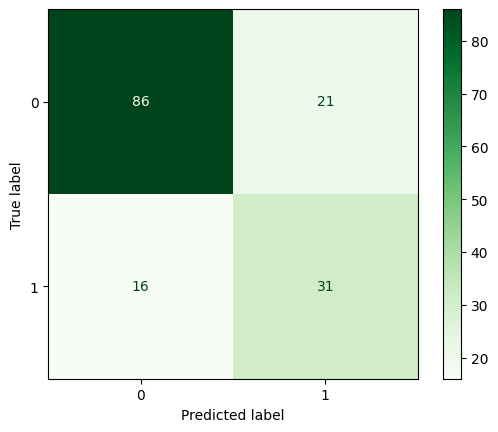

In [299]:
cm3 = confusion_matrix(y_test, y_pred_nb)
print(cm3)
acc3= accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {acc3}' )
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap = 'Greens')


**Logistic Regression**

In [300]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [301]:
y_pred_lr = lr.predict(X_test)

[[97 10]
 [21 26]]
Accuracy: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



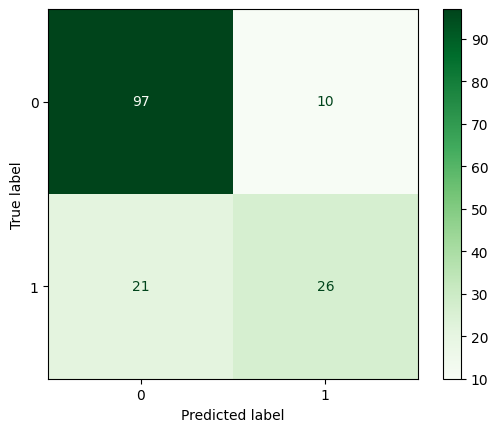

In [302]:
cm4 = confusion_matrix(y_test, y_pred_lr)
print(cm4)
acc4= accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {acc4}' )
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap = 'Greens')

**Decision Tree**

In [303]:
#Training the model using Decsion Trees Classifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [304]:
y_pred_dt = dt_classifier.predict(X_test)

[[83 24]
 [21 26]]
Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       107
           1       0.52      0.55      0.54        47

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154



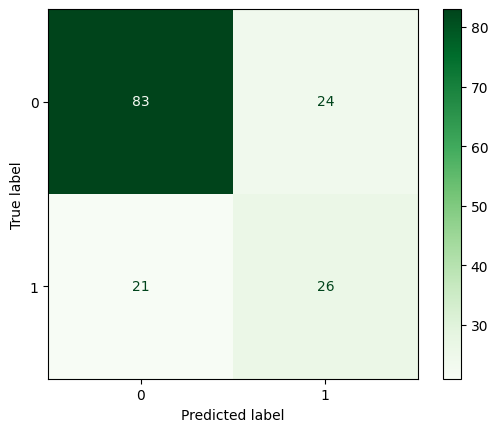

In [305]:
cm5 = confusion_matrix(y_test, y_pred_dt)
print(cm5)
acc5= accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {acc5}' )
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap = 'Greens')


**Random Forest Classifier**

In [306]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [307]:
y_pred_rf = rf_classifier.predict(X_test)

[[94 13]
 [18 29]]
Accuracy: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



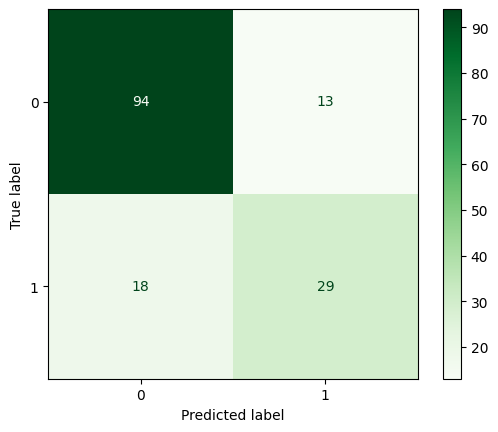

In [308]:
cm6 = confusion_matrix(y_test, y_pred_rf)
print(cm6)
acc6= accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {acc6}' )
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap = 'Greens')


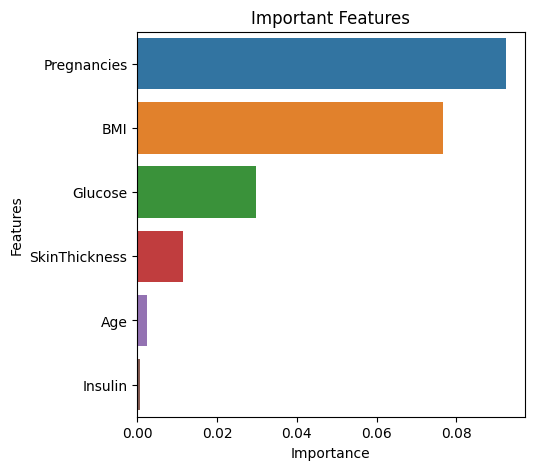

In [309]:
svm_classifier.fit(X, y)

# Get the coefficients from the model
coefficients = svm_classifier.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
IF1 = pd.DataFrame({"Features": np.array(X.columns), "Coefficient": coefficients})

# Sort the DataFrame by absolute coefficient values in descending order
IF1['Importance'] = np.abs(IF1['Coefficient'])
IF1 = IF1.sort_values(by=['Importance'], ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(5, 5))
sns.barplot(x='Importance', y='Features', data=IF1[:10])
plt.title('Important Features')
plt.show()

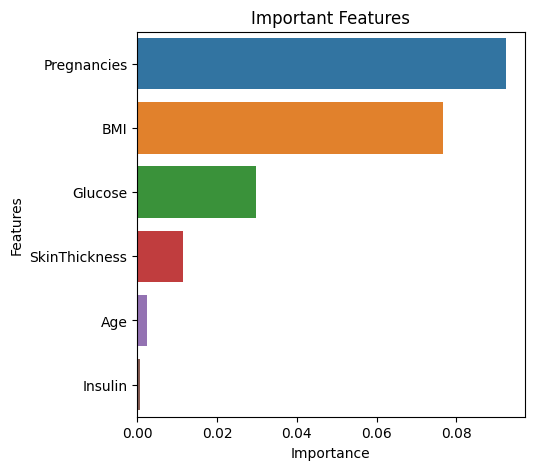

In [310]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Access feature importances
feature_importances = rf_model.feature_importances_
#print("Feature Importances:", feature_importances)
 #Frame({"Features": np.array(X.columns), "Coefficient": coefficients})

# Sort the DataFrame by absolute coefficient values in descending order
IF1['Importance'] = np.abs(IF1['Coefficient'])
IF1 = IF1.sort_values(by=['Importance'], ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(5, 5))
sns.barplot(x='Importance', y='Features', data=IF1[:10])
plt.title('Important Features')
plt.show()

**Hyper parameter tuning**

**SVM**

In [ ]:
#Hyperparamter tuning using Gridsearch
svm_params = {"C":(0.1,1,2,5),
       "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
         "kernel":('linear', 'poly', 'rbf')}

grid_search = GridSearchCV(estimator= svm_classifier, param_grid= svm_params, scoring = 'accuracy', cv =5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': (0.1, 1, 2, 5),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)


Best Accuracy: 77.37%
Best Parameters: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


**KNN**

In [ ]:
# Tunning Params
knn_params = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}
grid_search = GridSearchCV(estimator= KNN_classifier, param_grid=knn_params, scoring = 'accuracy', cv =10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [ ]:

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 76.72%
Best Parameters: {'leaf_size': 1, 'n_neighbors': 25, 'weights': 'uniform'}


**Naive Bayes**

In [ ]:
# Tunning Params
NB_params = {'var_smoothing': [1e-11, 1e-10, 1e-9]}

grid_search = GridSearchCV(estimator= NaiveBayes_classifier, param_grid=NB_params, scoring = 'accuracy', cv =10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09]},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)


Best Accuracy: 76.55%
Best Parameters: {'var_smoothing': 1e-11}


**Decision Trees**

In [ ]:
parameters =[{"criterion": ("gini", "entropy"),
          "splitter": ("best", "random"),
          "max_depth": np.arange(1, 20),
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": np.arange(1, 20)}]

grid_search = GridSearchCV(estimator= dt_classifier, param_grid=parameters, scoring = 'accuracy', cv =10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid=[{'criterion': ('gini', 'entropy'),
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'min_samples_split': [2, 3, 4],
                          'splitter': ('best', 'random')}],
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)


Best Accuracy: 76.54%
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


**Logistic Regression**

In [133]:
lr_params = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
   'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

grid_search = GridSearchCV(estimator= lr, param_grid= lr_params, scoring = 'accuracy', cv =10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [134]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 77.03%
Best Parameters: {'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


**Random Forest Classifier**

In [129]:
parameters =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}


grid_search = GridSearchCV(estimator= rf_classifier, param_grid= parameters, scoring = 'accuracy', cv =5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25],
                         'max_features': ['auto', 'sqrt', 10],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [400, 450, 500, 550]},
             scoring='accuracy')

In [130]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 77.04%
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
